# Лабораторная работа №4. Обучение с учителем.

## Датасет "Набор данных для анализа и прогнозирования сердечного приступа".

[**Ссылка**](https://www.kaggle.com/datasets/kamilpytlak/personal-key-indicators-of-heart-disease)

### Описание датасета

**Проблемная область**: Датасет связан с медицинской статистикой и направлен на анализ факторов, связанных с риском сердечного приступа. Это важно для прогнозирования и разработки стратегий профилактики сердечно-сосудистых заболеваний.

**Актуальность**: Сердечно-сосудистые заболевания являются одной из ведущих причин смертности во всем мире. Анализ данных об образе жизни, состоянии здоровья и наследственных факторах позволяет выделить ключевые предикторы, влияющие на развитие сердечно-сосудистых заболеваний. Этот датасет предоставляет инструменты для анализа таких факторов и может быть полезен в создании прогнозных моделей, направленных на снижение рисков и своевременную диагностику.

**Объекты наблюдения**: Каждая запись представляет собой данные о человеке, включая информацию об их состоянии здоровья, образе жизни, демографических характеристиках и наличию определенных заболеваний. Объекты наблюдений — это индивидуальные пациенты.

**Атрибуты объектов:**
- `HeartDisease` — наличие сердечного приступа (Yes/No) (целевая переменная).
- `BMI` — индекс массы тела (Body Mass Index), числовой показатель.
- `Smoking` — курение (Yes/No).
- `AlcoholDrinking` — употребление алкоголя (Yes/No).
- `Stroke` — наличие инсульта (Yes/No).
- `PhysicalHealth` — количество дней в месяц, когда физическое здоровье было неудовлетворительным.
- `MentalHealth` — количество дней в месяц, когда психическое здоровье было неудовлетворительным.
- `DiffWalking` — трудности при ходьбе (Yes/No).
- `Sex` — пол (Male/Female).
- `AgeCategory` — возрастная категория (например, 55-59, 80 or older).
- `Race` — расовая принадлежность (например, White, Black).
- `Diabetic` — наличие диабета (Yes/No/No, borderline diabetes).
- `PhysicalActivity` — физическая активность (Yes/No).
- `GenHealth` — общее состояние здоровья (от Excellent до Poor).
- `SleepTime` — среднее количество часов сна за сутки.
- `Asthma` — наличие астмы (Yes/No).
- `KidneyDisease` — наличие заболеваний почек (Yes/No).
- `SkinCancer` — наличие кожного рака (Yes/No).

In [2]:
import pandas as pd
df = pd.read_csv(".//static//csv//heart_2020_cleaned.csv")
df.head()

HeartDisease    BMI Smoking AlcoholDrinking Stroke  PhysicalHealth  \
0           No  16.60     Yes              No     No             3.0   
1           No  20.34      No              No    Yes             0.0   
2           No  26.58     Yes              No     No            20.0   
3           No  24.21      No              No     No             0.0   
4           No  23.71      No              No     No            28.0   

   MentalHealth DiffWalking     Sex  AgeCategory   Race Diabetic  \
0          30.0          No  Female        55-59  White      Yes   
1           0.0          No  Female  80 or older  White       No   
2          30.0          No    Male        65-69  White      Yes   
3           0.0          No  Female        75-79  White       No   
4           0.0         Yes  Female        40-44  White       No   

  PhysicalActivity  GenHealth  SleepTime Asthma KidneyDisease SkinCancer  
0              Yes  Very good        5.0    Yes            No        Yes  
1              Yes  Very good        7.0     No            No         No  
2              Yes       Fair        8.0    Yes            No         No  
3               No       Good        6.0     No            No        Yes  
4              Yes  Very good        8.0     No            No         No

## Бизнес-цель №1. Задача классификации

### Описание бизнес-цели

**Цель**: предсказание наличия сердечного приступа. Цель состоит в разработке модели, которая будет предсказывать, возникнет ли у человека сердечный приступ (признак `HeartDisease`). Это важная задача для профилактики сердечно-сосудистых заболеваний, позволяющая выявить группы риска и назначить своевременное лечение или профилактические меры.

### Достижимый уровень качества модели

**Основные метрики для классификации:**

- **Accuracy** (*точность*) – показывает долю правильно классифицированных примеров среди всех наблюдений. Легко интерпретируется, но может быть недостаточно информативной для несбалансированных классов.
- **F1-Score** – гармоническое среднее между точностью (precision) и полнотой (recall). Подходит для задач, где важно одновременно учитывать как ложные положительные, так и ложные отрицательные ошибки, особенно при несбалансированных классах.
- **ROC AUC** (*Area Under the ROC Curve*) – отражает способность модели различать положительные и отрицательные классы на всех уровнях порога вероятности. Значение от 0.5 (случайное угадывание) до 1.0 (идеальная модель). Полезна для оценки модели на несбалансированных данных.
- **Cohen's Kappa** – измеряет степень согласия между предсказаниями модели и истинными метками с учётом случайного угадывания. Значения варьируются от -1 (полное несогласие) до 1 (идеальное согласие). Удобна для оценки на несбалансированных данных.
- **MCC** (*Matthews Correlation Coefficient*) – метрика корреляции между предсказаниями и истинными классами, учитывающая все типы ошибок (TP, TN, FP, FN). Значение варьируется от -1 (полная несоответствие) до 1 (идеальное совпадение). Отлично подходит для задач с несбалансированными классами.
- **Confusion Matrix** (*матрица ошибок*) – матрица ошибок отражает распределение предсказаний модели по каждому из классов.

### Выбор ориентира

В качестве базовой модели для оценки качества предсказаний выбрано использование самой распространённой категории целевой переменной `HeartDisease` в обучающей выборке. Этот подход, известный как "most frequent class baseline", заключается в том, что модель всегда предсказывает наиболее часто встречающееся значение наличия сердечного приступа.

### Разбиение набора данных на выборки

Выполним разбиение исходного набора на **обучающую** (80%) и **тестовую** (20%) выборки:

In [3]:
from typing import Tuple
import pandas as pd
from pandas import DataFrame
from sklearn.model_selection import train_test_split

def split_stratified_into_train_val_test(
    df_input,
    stratify_colname="y",
    frac_train=0.6,
    frac_val=0.15,
    frac_test=0.25,
    random_state=None,
) -> Tuple[DataFrame, DataFrame, DataFrame, DataFrame, DataFrame, DataFrame]:
   
    if frac_train + frac_val + frac_test != 1.0:
        raise ValueError(
            "fractions %f, %f, %f do not add up to 1.0"
            % (frac_train, frac_val, frac_test)
        )
    if stratify_colname not in df_input.columns:
        raise ValueError("%s is not a column in the dataframe" % (stratify_colname))
    X = df_input
    y = df_input[
        [stratify_colname]
    ]
    df_train, df_temp, y_train, y_temp = train_test_split(
        X, y, stratify=y, test_size=(1.0 - frac_train), random_state=random_state
    )
    if frac_val <= 0:
        assert len(df_input) == len(df_train) + len(df_temp)
        return df_train, pd.DataFrame(), df_temp, y_train, pd.DataFrame(), y_temp
    
    relative_frac_test = frac_test / (frac_val + frac_test)
    df_val, df_test, y_val, y_test = train_test_split(
        df_temp,
        y_temp,
        stratify=y_temp,
        test_size=relative_frac_test,
        random_state=random_state,
    )
    assert len(df_input) == len(df_train) + len(df_val) + len(df_test)
    return df_train, df_val, df_test, y_train, y_val, y_test

X_train, X_val, X_test, y_train, y_val, y_test = split_stratified_into_train_val_test(
    df, stratify_colname='HeartDisease', frac_train=0.8, frac_val=0, frac_test=0.2, random_state=9
)

display("X_train", X_train)
display("y_train", y_train)

display("X_test", X_test)
display("y_test", y_test)

'X_train'

HeartDisease    BMI Smoking AlcoholDrinking Stroke  PhysicalHealth  \
249455           No  65.00      No              No     No             3.0   
14270            No  31.89      No              No     No             0.0   
163088           No  24.41      No              No     No             0.0   
136626          Yes  36.86     Yes              No     No            30.0   
265773           No  35.15     Yes              No     No             2.0   
...             ...    ...     ...             ...    ...             ...   
193686           No  30.43     Yes              No     No             0.0   
207316           No  33.66     Yes              No     No             0.0   
229094           No  38.95      No              No     No             0.0   
148788           No  35.44     Yes              No     No             0.0   
35742            No  27.26     Yes              No     No             0.0   

        MentalHealth DiffWalking     Sex AgeCategory      Race  \
249455           0.0          No  Female       30-34     White   
14270            0.0          No  Female       55-59  Hispanic   
163088           5.0          No    Male       40-44     White   
136626           0.0         Yes    Male       65-69     White   
265773           0.0          No    Male       70-74     White   
...              ...         ...     ...         ...       ...   
193686           0.0          No    Male       55-59     White   
207316           0.0          No  Female       55-59     White   
229094           0.0          No    Male       60-64     White   
148788           0.0          No    Male       70-74     White   
35742            0.0          No    Male       35-39     White   

                       Diabetic PhysicalActivity  GenHealth  SleepTime Asthma  \
249455                       No              Yes       Good        7.0    Yes   
14270                        No              Yes       Good        8.0     No   
163088                       No              Yes  Very good        7.0     No   
136626  No, borderline diabetes               No       Good        8.0     No   
265773                       No              Yes       Good        7.0     No   
...                         ...              ...        ...        ...    ...   
193686                       No              Yes  Excellent        7.0     No   
207316                       No              Yes  Very good        6.0     No   
229094                      Yes              Yes       Good        7.0     No   
148788                       No               No  Very good        6.0     No   
35742                        No              Yes  Very good        8.0     No   

       KidneyDisease SkinCancer  
249455            No         No  
14270             No         No  
163088            No         No  
136626            No         No  
265773           Yes         No  
...              ...        ...  
193686            No         No  
207316            No         No  
229094            No         No  
148788            No         No  
35742             No         No  

[255836 rows x 18 columns]

'y_train'

HeartDisease
249455           No
14270            No
163088           No
136626          Yes
265773           No
...             ...
193686           No
207316           No
229094           No
148788           No
35742            No

[255836 rows x 1 columns]

'X_test'

HeartDisease    BMI Smoking AlcoholDrinking Stroke  PhysicalHealth  \
215485           No  32.89      No              No     No            10.0   
150930           No  33.00     Yes              No     No             0.0   
305511           No  39.16     Yes              No     No             0.0   
284576           No  28.89     Yes              No     No             0.0   
170107           No  33.96      No              No     No             0.0   
...             ...    ...     ...             ...    ...             ...   
318712           No  34.70     Yes              No     No            30.0   
169792           No  32.61     Yes              No     No             7.0   
19564            No  25.09     Yes              No     No             0.0   
74293            No  21.29     Yes             Yes     No             0.0   
284877          Yes  23.30      No              No     No             0.0   

        MentalHealth DiffWalking     Sex  AgeCategory      Race Diabetic  \
215485           5.0         Yes    Male        45-49     White      Yes   
150930           0.0          No    Male        50-54     Black       No   
305511           0.0         Yes  Female        75-79     White      Yes   
284576           0.0          No    Male        65-69     White      Yes   
170107           0.0          No  Female        60-64     White       No   
...              ...         ...     ...          ...       ...      ...   
318712           0.0          No    Male        25-29  Hispanic       No   
169792           0.0          No  Female        60-64  Hispanic       No   
19564            2.0          No    Male        60-64     Black       No   
74293            0.0         Yes    Male        60-64     White      Yes   
284877           0.0          No  Female  80 or older     White       No   

       PhysicalActivity  GenHealth  SleepTime Asthma KidneyDisease SkinCancer  
215485               No       Good        6.0    Yes            No         No  
150930               No       Fair        8.0     No            No         No  
305511              Yes  Very good        7.0     No            No         No  
284576              Yes  Very good        7.0     No            No         No  
170107              Yes  Very good        7.0     No            No         No  
...                 ...        ...        ...    ...           ...        ...  
318712              Yes  Excellent        8.0    Yes            No         No  
169792              Yes       Fair        7.0     No            No         No  
19564               Yes  Very good        8.0     No            No         No  
74293               Yes       Good        8.0     No            No         No  
284877              Yes       Good        6.0     No            No         No  

[63959 rows x 18 columns]

'y_test'

HeartDisease
215485           No
150930           No
305511           No
284576           No
170107           No
...             ...
318712           No
169792           No
19564            No
74293            No
284877          Yes

[63959 rows x 1 columns]

Построим **базовую модель**, описанную выше, и оценим ее метрики *Accuracy* и *F1-Score*:

In [5]:
from sklearn.metrics import accuracy_score, f1_score

# Определяем самый частый класс
most_frequent_class = y_train.mode().values[0][0]
print(f"Самый частый класс: {most_frequent_class}")

# Вычисляем предсказания базовой модели (все предсказания равны самому частому классу)
baseline_predictions: list[str] = [most_frequent_class] * len(y_test)

# Оцениваем базовую модель
print('Baseline Accuracy:', accuracy_score(y_test, baseline_predictions))
print('Baseline F1:', f1_score(y_test, baseline_predictions, average='weighted'))

# Унитарное кодирование для целевого признака
y_train = y_train['HeartDisease'].map({'Yes': 1, 'No': 0})
y_test = y_test['HeartDisease'].map({'Yes': 1, 'No': 0})

Самый частый класс: No
Baseline Accuracy: 0.9143982864022264
Baseline F1: 0.8735112563715003


### Выбор моделей обучения

Для обучения были выбраны следующие модели:

1. **Случайный лес** (*Random Forest*): Ансамблевая модель, которая использует множество решающих деревьев. Она хорошо справляется с нелинейными зависимостями и шумом в данных, а также обладает устойчивостью к переобучению.
2. **Логистическая регрессия** (*Logistic Regression*): Статистический метод для бинарной классификации, который моделирует зависимость между целевой переменной и независимыми признаками, используя логистическую функцию. Она проста в интерпретации и быстра в обучении.
3. **Метод ближайших соседей** (*KNN*): Алгоритм классификации, который предсказывает класс на основе ближайших k обучающих примеров. KNN интуитивно понятен и не требует обучения, но может быть медленным на больших данных и чувствительным к выбору параметров.

### Построение конвейера

In [4]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Разделение признаков на числовые и категориальные
num_columns = [
    column
    for column in df.columns
    if df[column].dtype != "object"
]
cat_columns = [
    column
    for column in df.columns
    if df[column].dtype == "object"
]

# Числовая обработка: заполнение пропусков медианой и стандартизация
num_imputer = SimpleImputer(strategy="median")
num_scaler = StandardScaler()
preprocessing_num = Pipeline(
    [
        ("imputer", num_imputer),
        ("scaler", num_scaler),
    ]
)

# Категориальная обработка: заполнение пропусков значением "unknown" и кодирование
cat_imputer = SimpleImputer(strategy="constant", fill_value="unknown")
cat_encoder = OneHotEncoder(handle_unknown="ignore", sparse_output=False, drop="first")
preprocessing_cat = Pipeline(
    [
        ("imputer", cat_imputer),
        ("encoder", cat_encoder),
    ]
)

# Общий конвейер обработки признаков
features_preprocessing = ColumnTransformer(
    verbose_feature_names_out=False,
    transformers=[
        ("prepocessing_num", preprocessing_num, num_columns),
        ("prepocessing_cat", preprocessing_cat, cat_columns),
    ],
    remainder="passthrough"
)

# Итоговый конвейер
pipeline_end = Pipeline(
    [
        ("features_preprocessing", features_preprocessing),
    ]
)

### Использование конвейера на тренировочных данных

In [5]:
preprocessing_result = pipeline_end.fit_transform(X_train)
preprocessed_df = pd.DataFrame(
    preprocessing_result,
    columns=pipeline_end.get_feature_names_out(),
)

preprocessed_df

BMI  PhysicalHealth  MentalHealth  SleepTime  HeartDisease_Yes  \
0       5.773647       -0.046285     -0.489254  -0.065882               0.0   
1       0.561206       -0.424023     -0.489254   0.630754               0.0   
2      -0.616356       -0.424023      0.140196  -0.065882               0.0   
3       1.343623        3.353355     -0.489254   0.630754               1.0   
4       1.074421       -0.172198     -0.489254  -0.065882               0.0   
...          ...             ...           ...        ...               ...   
255831  0.331361       -0.424023     -0.489254  -0.065882               0.0   
255832  0.839853       -0.424023     -0.489254  -0.762519               0.0   
255833  1.672648       -0.424023     -0.489254  -0.065882               0.0   
255834  1.120075       -0.424023     -0.489254  -0.762519               0.0   
255835 -0.167686       -0.424023     -0.489254   0.630754               0.0   

        Smoking_Yes  AlcoholDrinking_Yes  Stroke_Yes  DiffWalking_Yes  \
0               0.0                  0.0         0.0              0.0   
1               0.0                  0.0         0.0              0.0   
2               0.0                  0.0         0.0              0.0   
3               1.0                  0.0         0.0              1.0   
4               1.0                  0.0         0.0              0.0   
...             ...                  ...         ...              ...   
255831          1.0                  0.0         0.0              0.0   
255832          1.0                  0.0         0.0              0.0   
255833          0.0                  0.0         0.0              0.0   
255834          1.0                  0.0         0.0              0.0   
255835          1.0                  0.0         0.0              0.0   

        Sex_Male  ...  Diabetic_Yes  Diabetic_Yes (during pregnancy)  \
0            0.0  ...           0.0                              0.0   
1            0.0  ...           0.0                              0.0   
2            1.0  ...           0.0                              0.0   
3            1.0  ...           0.0                              0.0   
4            1.0  ...           0.0                              0.0   
...          ...  ...           ...                              ...   
255831       1.0  ...           0.0                              0.0   
255832       0.0  ...           0.0                              0.0   
255833       1.0  ...           1.0                              0.0   
255834       1.0  ...           0.0                              0.0   
255835       1.0  ...           0.0                              0.0   

        PhysicalActivity_Yes  GenHealth_Fair  GenHealth_Good  GenHealth_Poor  \
0                        1.0             0.0             1.0             0.0   
1                        1.0             0.0             1.0             0.0   
2                        1.0             0.0             0.0             0.0   
3                        0.0             0.0             1.0             0.0   
4                        1.0             0.0             1.0             0.0   
...                      ...             ...             ...             ...   
255831                   1.0             0.0             0.0             0.0   
255832                   1.0             0.0             0.0             0.0   
255833                   1.0             0.0             1.0             0.0   
255834                   0.0             0.0             0.0             0.0   
255835                   1.0             0.0             0.0             0.0   

        GenHealth_Very good  Asthma_Yes  KidneyDisease_Yes  SkinCancer_Yes  
0                       0.0         1.0                0.0             0.0  
1                       0.0         0.0                0.0             0.0  
2                       1.0         0.0                0.0             0.0  
3                       0.0         0.0              

### Обучение моделей

In [9]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics


# Оценка качества различных моделей на основе метрик
def evaluate_models(models, 
                    pipeline_end: Pipeline, 
                    X_train: DataFrame, y_train, 
                    X_test: DataFrame, y_test):
    results = {}
    
    for model_name, model in models.items():
        # Создание конвейера для текущей модели
        model_pipeline = Pipeline(
            [
                ("pipeline", pipeline_end), 
                ("model", model),
            ]
        )
        
        # Обучение модели
        model_pipeline.fit(X_train, y_train)
        
        # Предсказание для обучающей и тестовой выборки
        y_train_predict = model_pipeline.predict(X_train)
        y_test_predict = model_pipeline.predict(X_test)
        
        # Вычисление метрик для текущей модели
        metrics_dict = {
            "Precision_train": metrics.precision_score(y_train, y_train_predict),
            "Precision_test": metrics.precision_score(y_test, y_test_predict),
            "Recall_train": metrics.recall_score(y_train, y_train_predict),
            "Recall_test": metrics.recall_score(y_test, y_test_predict),
            "Accuracy_train": metrics.accuracy_score(y_train, y_train_predict),
            "Accuracy_test": metrics.accuracy_score(y_test, y_test_predict),
            "F1_train": metrics.f1_score(y_train, y_train_predict),
            "F1_test": metrics.f1_score(y_test, y_test_predict),
            "ROC_AUC_test": metrics.roc_auc_score(y_test, y_test_predict),
            "Cohen_kappa_test": metrics.cohen_kappa_score(y_test, y_test_predict),
            "MCC_test": metrics.matthews_corrcoef(y_test, y_test_predict),
            "Confusion_matrix": metrics.confusion_matrix(y_test, y_test_predict),
        }
        
        # Сохранение результатов
        results[model_name] = metrics_dict
    
    return results


# Выбранные модели для классификации
models_classification = {
    "RandomForestClassifier": RandomForestClassifier(random_state=42),
    "LogisticRegression": LogisticRegression(max_iter=1000),
    "KNN": KNeighborsClassifier(),
}

results = evaluate_models(models_classification,
                                                     pipeline_end,
                                                     X_train, y_train,
                                                     X_test, y_test)

# Вывод результатов
for model_name, metrics_dict in results.items():
    print(f"Модель: {model_name}")
    for metric_name, value in metrics_dict.items():
        print(f"\t{metric_name}: {value}")
    print()

Модель: RandomForestClassifier
	Precision_train: 1.0
	Precision_test: 1.0
	Recall_train: 1.0
	Recall_test: 1.0
	Accuracy_train: 1.0
	Accuracy_test: 1.0
	F1_train: 1.0
	F1_test: 1.0
	ROC_AUC_test: 1.0
	Cohen_kappa_test: 1.0
	MCC_test: 1.0
	Confusion_matrix: [[58484     0]
 [    0  5475]]

Модель: LogisticRegression
	Precision_train: 1.0
	Precision_test: 1.0
	Recall_train: 1.0
	Recall_test: 1.0
	Accuracy_train: 1.0
	Accuracy_test: 1.0
	F1_train: 1.0
	F1_test: 1.0
	ROC_AUC_test: 1.0
	Cohen_kappa_test: 1.0
	MCC_test: 1.0
	Confusion_matrix: [[58484     0]
 [    0  5475]]

Модель: KNN
	Precision_train: 0.9985596365852307
	Precision_test: 0.9934322549258088
	Recall_train: 0.8231345328340488
	Recall_test: 0.7459360730593607
	Accuracy_train: 0.9847597679763599
	Accuracy_test: 0.9778295470535812
	F1_train: 0.9024005607149115
	F1_test: 0.8520759440851241
	ROC_AUC_test: 0.872737204165273
	Cohen_kappa_test: 0.8403545562876147
	MCC_test: 0.8504421479558301
	Confusion_matrix: [[58457    27]
 [ 1391  

**Результаты:**

1. **Случайный лес (Random Forest)**:
    - Метрики:
        * Precision (обучение): 1.0
        * Precision (тест): 1.0
        * Recall (обучение): 1.0
        * Recall (тест): 1.0
        * Accuracy (обучение): 1.0
        * Accuracy (тест): 1.0
        * F1 Score (обучение): 1.0
        * F1 Score (тест): 1.0
        * ROC AUC (тест): 1.0
        * Cohen Kappa (тест): 1.0
        * MCC (тест): 1.0
        * Confusion Matrix (тест):         
        ```
        [[58484     0]
        [    0  5475]]
        ```
    - ***Вывод***: модель продемонстрировала идеальные результаты как на обучающей, так и на тестовой выборке. Все метрики (Precision, Recall, Accuracy, F1 Score, ROC AUC и др.) равны 1.0, что свидетельствует о 100%-й точности классификации. Вероятно, модель переобучилась, так как такие результаты практически невозможно достичь на реальных данных. Необходимо проверить данные, наличие утечек информации (например, коррелирующих с целевой переменной признаков), а также параметры модели.

2. **Логистическая регрессия (Logistic Regression)**:
    - Метрики:
        * Precision (обучение): 1.0
        * Precision (тест): 1.0
        * Recall (обучение): 1.0
        * Recall (тест): 1.0
        * Accuracy (обучение): 1.0
        * Accuracy (тест): 1.0
        * F1 Score (обучение): 1.0
        * F1 Score (тест): 1.0
        * ROC AUC (тест): 1.0
        * Cohen Kappa (тест): 1.0
        * MCC (тест): 1.0
        * Confusion Matrix (тест):         
        ```
        [[58484     0]
        [    0  5475]]
        ```
    - ***Вывод***: аналогично Random Forest, результаты выглядят идеальными: все метрики равны 1.0, включая ROC AUC, что предполагает идеальную работу модели. Здесь также есть признаки переобучения или утечки данных. Необходимо пересмотреть подготовку данных и проверить конвейер обработки (особенно этапы предобработки).

3. **Метод ближайших соседей (KNN)**:
    - Метрики:
        * Precision (обучение): 0.999
        * Precision (тест): 0.993
        * Recall (обучение): 0.823
        * Recall (тест): 0.746
        * Accuracy (обучение): 0.985
        * Accuracy (тест): 0.978
        * F1 Score (обучение): 0.902
        * F1 Score (тест): 0.852
        * ROC AUC (тест): 0.872
        * Cohen Kappa (тест): 0.840
        * MCC (тест): 0.850
        * Confusion Matrix (тест):         
        ```
        [[58457    27]
        [  1391 4084]]
        ```
    - ***Вывод***: модель KNN выглядит наиболее реалистичной и стабильной, но уступает случайному лесу и логистической регрессии в точности. Эта модель является хорошей точкой отсчета для дальнейших экспериментов.

### Матрица неточностей

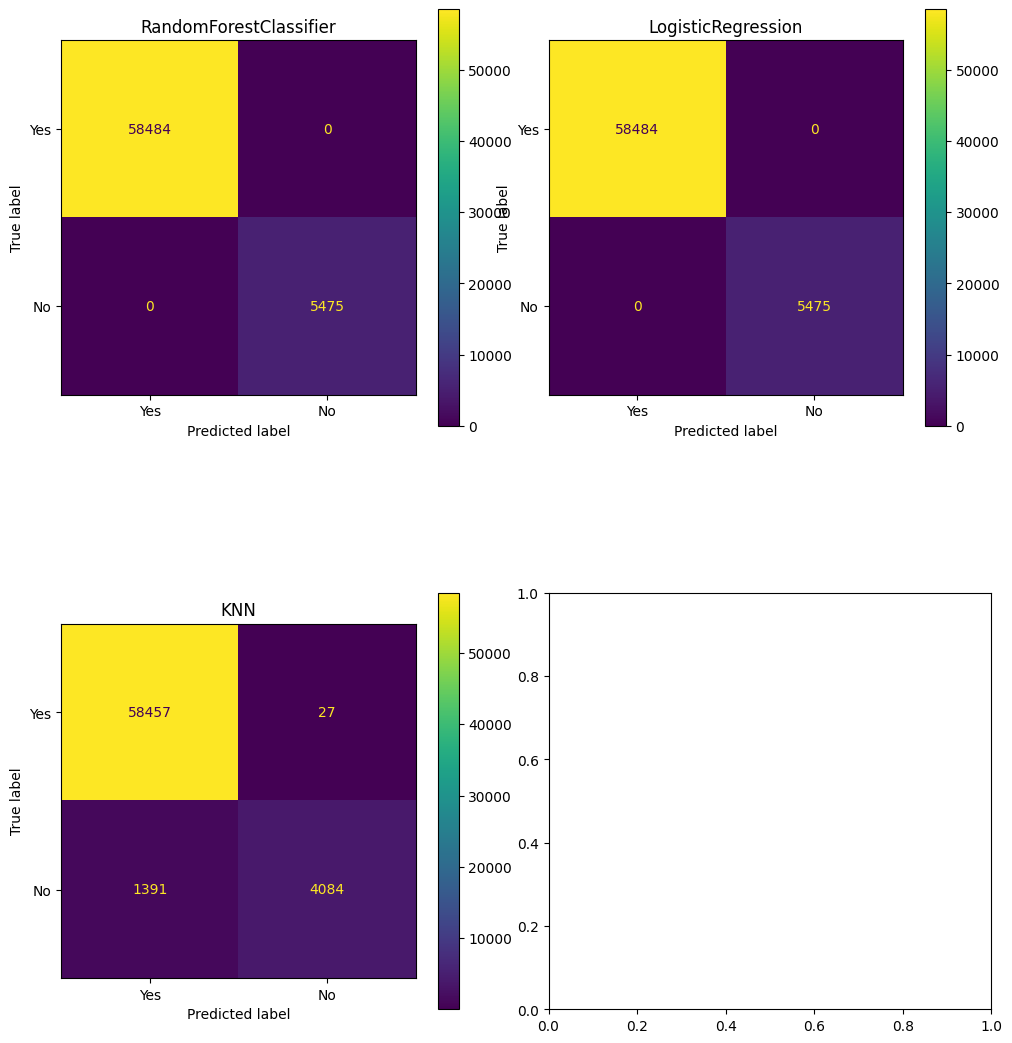

In [10]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from math import ceil

_, ax = plt.subplots(ceil(len(models_classification) / 2), 2, figsize=(12, 10), sharex=False, sharey=False)

for index, key in enumerate(models_classification.keys()):
  c_matrix = results[key]["Confusion_matrix"]
  disp = ConfusionMatrixDisplay(
    confusion_matrix=c_matrix, display_labels=["Yes", "No"]
  ).plot(ax=ax.flat[index])
  disp.ax_.set_title(key)

plt.subplots_adjust(top=1, bottom=0, hspace=0.4, wspace=0.1)
plt.show()

### Подбор гиперпараметров

In [11]:
from sklearn.model_selection import GridSearchCV

# Создание конвейера
pipeline = Pipeline([
    ("processing", pipeline_end),
    ("model", RandomForestClassifier(random_state=42))
])

# Установка параметров для поиска по сетке
param_grid = {
    "model__n_estimators": [10, 50, 100],
    "model__max_features": ["sqrt", "log2"],
    "model__max_depth": [5, 7, 10],
    "model__criterion": ["gini", "entropy"],
}

# Подбор гиперпараметров с помощью поиска по сетке
grid_search = GridSearchCV(estimator=pipeline, 
                           param_grid=param_grid,
                           n_jobs=-1)

# Обучение модели на тренировочных данных
grid_search.fit(X_train, y_train)

# Результаты подбора гиперпараметров
print("Лучшие параметры:", grid_search.best_params_)

c:\Users\Oleg\Desktop\AIM_ForLab4\lab_4\aimenv\Lib\site-packages\numpy\ma\core.py:2881: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Лучшие параметры: {'model__criterion': 'gini', 'model__max_depth': 5, 'model__max_features': 'sqrt', 'model__n_estimators': 100}


### Сравнение наборов гиперпараметров

In [12]:
# Обучение модели со старыми гипермараметрами
pipeline.fit(X_train, y_train)

# Предсказание для обучающей и тестовой выборки
y_train_predict = pipeline.predict(X_train)
y_test_predict = pipeline.predict(X_test)
        
# Вычисление метрик для модели со старыми гипермараметрами
base_model_metrics = {
    "Precision_train": metrics.precision_score(y_train, y_train_predict),
    "Precision_test": metrics.precision_score(y_test, y_test_predict),
    "Recall_train": metrics.recall_score(y_train, y_train_predict),
    "Recall_test": metrics.recall_score(y_test, y_test_predict),
    "Accuracy_train": metrics.accuracy_score(y_train, y_train_predict),
    "Accuracy_test": metrics.accuracy_score(y_test, y_test_predict),
    "F1_train": metrics.f1_score(y_train, y_train_predict),
    "F1_test": metrics.f1_score(y_test, y_test_predict),
    "ROC_AUC_test": metrics.roc_auc_score(y_test, y_test_predict),
    "Cohen_kappa_test": metrics.cohen_kappa_score(y_test, y_test_predict),
    "MCC_test": metrics.matthews_corrcoef(y_test, y_test_predict),
    "Confusion_matrix": metrics.confusion_matrix(y_test, y_test_predict),
}

# Модель с новыми гипермараметрами
optimized_model = RandomForestClassifier(
    random_state=42,
    criterion="gini",
    max_depth=5,
    max_features="sqrt",
    n_estimators=10,
)

# Создание конвейера для модели с новыми гипермараметрами
optimized_model_pipeline = Pipeline(
    [
        ("pipeline", pipeline_end), 
        ("model", optimized_model),
    ]
)
        
# Обучение модели с новыми гипермараметрами
optimized_model_pipeline.fit(X_train, y_train)
        
# Предсказание для обучающей и тестовой выборки
y_train_predict = optimized_model_pipeline.predict(X_train)
y_test_predict = optimized_model_pipeline.predict(X_test)
        
# Вычисление метрик для модели с новыми гипермараметрами
optimized_model_metrics = {
    "Precision_train": metrics.precision_score(y_train, y_train_predict),
    "Precision_test": metrics.precision_score(y_test, y_test_predict),
    "Recall_train": metrics.recall_score(y_train, y_train_predict),
    "Recall_test": metrics.recall_score(y_test, y_test_predict),
    "Accuracy_train": metrics.accuracy_score(y_train, y_train_predict),
    "Accuracy_test": metrics.accuracy_score(y_test, y_test_predict),
    "F1_train": metrics.f1_score(y_train, y_train_predict),
    "F1_test": metrics.f1_score(y_test, y_test_predict),
    "ROC_AUC_test": metrics.roc_auc_score(y_test, y_test_predict),
    "Cohen_kappa_test": metrics.cohen_kappa_score(y_test, y_test_predict),
    "MCC_test": metrics.matthews_corrcoef(y_test, y_test_predict),
    "Confusion_matrix": metrics.confusion_matrix(y_test, y_test_predict),
}

# Вывод информации
print('Стоковая модель:')
for metric_name, value in base_model_metrics.items():
    print(f"\t{metric_name}: {value}")

print('\nОптимизированная модель:')
for metric_name, value in optimized_model_metrics.items():
    print(f"\t{metric_name}: {value}")

Стоковая модель:
	Precision_train: 1.0
	Precision_test: 1.0
	Recall_train: 1.0
	Recall_test: 1.0
	Accuracy_train: 1.0
	Accuracy_test: 1.0
	F1_train: 1.0
	F1_test: 1.0
	ROC_AUC_test: 1.0
	Cohen_kappa_test: 1.0
	MCC_test: 1.0
	Confusion_matrix: [[58484     0]
 [    0  5475]]

Оптимизированная модель:
	Precision_train: 1.0
	Precision_test: 1.0
	Recall_train: 0.9995433372910768
	Recall_test: 0.9994520547945206
	Accuracy_train: 0.9999609124595444
	Accuracy_test: 0.9999530949514532
	F1_train: 0.9997716164984242
	F1_test: 0.9997259523157029
	ROC_AUC_test: 0.9997260273972604
	Cohen_kappa_test: 0.9997003049351247
	MCC_test: 0.9997003498302348
	Confusion_matrix: [[58484     0]
 [    3  5472]]


## Бизнес-цель №2. Задача регрессии

### Описание бизнес-цели

**Цель**: прогнозирование количества дней с плохим физическим здоровьем. Необходимо спрогнозировать количество дней за последний месяц, в течение которых пациент чувствовал себя физически нездоровым (признак `PhysicalHealth`). Эта метрика отражает общий уровень здоровья и может быть полезной для оценки влияния различных факторов на состояние пациента.

### Достижимый уровень качества модели

**Основные метрики для регрессии:**

- **Средняя абсолютная ошибка** (*Mean Absolute Error, MAE*) – показывает среднее абсолютное отклонение между предсказанными и фактическими значениями. Легко интерпретируется, особенно в финансовых данных, где каждая ошибка в долларах имеет значение.
- **Среднеквадратичная ошибка** (*Mean Squared Error, MSE*) – показывает, насколько отклоняются прогнозы модели от истинных значений в квадрате. Подходит для оценки общего качества модели.
- **Коэффициент детерминации** (*R²*) – указывает, какую долю дисперсии зависимой переменной объясняет модель. R² варьируется от 0 до 1 (чем ближе к 1, тем лучше).

### Выбор ориентира

В качестве базовой модели для оценки качества предсказаний выбрано использование среднего значения целевого признака `PhysicalHealth` на обучающей выборке. Это простой и интуитивно понятный метод, который служит минимальным ориентиром для сравнения с более сложными моделями. Базовая модель помогает установить начальный уровень ошибок (MAE, MSE) и показатель качества (R²), которые сложные модели должны улучшить, чтобы оправдать своё использование.

### Разбиение набора данных на выборки

Выполним разбиение исходного набора на **обучающую** (80%) и **тестовую** (20%) выборки:

In [6]:
X_df_train, X_df_val, X_df_test, y_df_train, y_df_val, y_df_test = split_stratified_into_train_val_test(
    df, stratify_colname='PhysicalHealth', frac_train=0.8, frac_val=0, frac_test=0.2, random_state=9
)

display("X_train", X_df_train)
display("y_train", y_df_train)

display("X_test", X_df_test)
display("y_test", y_df_test)

'X_train'

HeartDisease    BMI Smoking AlcoholDrinking Stroke  PhysicalHealth  \
46650            No  30.90      No              No     No            30.0   
305695           No  23.75      No             Yes     No             0.0   
17353            No  34.70      No              No     No             0.0   
154614           No  26.37     Yes              No     No             0.0   
146811           No  18.79      No              No     No             0.0   
...             ...    ...     ...             ...    ...             ...   
224078           No  24.13     Yes              No     No             0.0   
14534            No  22.32     Yes              No     No             0.0   
156850           No  23.78     Yes              No     No             2.0   
221285           No  26.52      No              No     No             0.0   
16625            No  23.57      No              No     No             0.0   

        MentalHealth DiffWalking     Sex  AgeCategory      Race Diabetic  \
46650            0.0         Yes  Female        70-74     White      Yes   
305695           0.0          No    Male        45-49     White       No   
17353            2.0          No  Female        70-74     White       No   
154614           0.0         Yes  Female  80 or older     Black      Yes   
146811           5.0          No  Female        18-24     Other       No   
...              ...         ...     ...          ...       ...      ...   
224078           0.0          No  Female        45-49     White       No   
14534            0.0          No  Female        50-54     White       No   
156850           0.0          No  Female        35-39     Black       No   
221285           0.0          No  Female        65-69  Hispanic      Yes   
16625            0.0          No    Male        40-44     White       No   

       PhysicalActivity  GenHealth  SleepTime Asthma KidneyDisease SkinCancer  
46650                No       Poor        7.0    Yes            No        Yes  
305695              Yes  Excellent        6.0    Yes           Yes         No  
17353                No       Good        7.0     No            No        Yes  
154614               No       Fair        4.0     No            No         No  
146811              Yes  Very good        6.0     No            No         No  
...                 ...        ...        ...    ...           ...        ...  
224078               No  Very good        8.0     No            No         No  
14534               Yes  Excellent        5.0     No            No         No  
156850              Yes  Very good        6.0     No            No         No  
221285              Yes       Good        8.0     No            No         No  
16625               Yes       Good        7.0     No            No         No  

[255836 rows x 18 columns]

'y_train'

PhysicalHealth
46650             30.0
305695             0.0
17353              0.0
154614             0.0
146811             0.0
...                ...
224078             0.0
14534              0.0
156850             2.0
221285             0.0
16625              0.0

[255836 rows x 1 columns]

'X_test'

HeartDisease    BMI Smoking AlcoholDrinking Stroke  PhysicalHealth  \
146589           No  19.45      No              No     No             1.0   
216017           No  26.36      No              No     No             0.0   
19624            No  24.59     Yes              No     No             0.0   
65923            No  23.44     Yes              No     No             0.0   
63362            No  31.32      No              No     No             0.0   
...             ...    ...     ...             ...    ...             ...   
252474           No  42.37      No              No     No             1.0   
147913           No  32.08     Yes              No     No             0.0   
244674           No  31.28      No              No     No             3.0   
215373           No  31.65      No              No     No             0.0   
179461           No  27.37      No              No     No             0.0   

        MentalHealth DiffWalking     Sex AgeCategory   Race Diabetic  \
146589           0.0         Yes    Male       25-29  White       No   
216017           0.0          No  Female       40-44  White       No   
19624            0.0         Yes    Male       55-59  White       No   
65923           20.0          No  Female       60-64  Asian       No   
63362            2.0          No  Female       45-49  White       No   
...              ...         ...     ...         ...    ...      ...   
252474           5.0          No  Female       18-24  White       No   
147913           0.0          No    Male       40-44  White       No   
244674           0.0          No  Female       50-54  White      Yes   
215373           0.0          No    Male       45-49  White       No   
179461           0.0          No    Male       65-69  White      Yes   

       PhysicalActivity  GenHealth  SleepTime Asthma KidneyDisease SkinCancer  
146589              Yes       Good       12.0     No            No         No  
216017              Yes  Very good        7.0     No            No         No  
19624               Yes       Good        6.0     No            No         No  
65923               Yes  Very good        6.0     No            No         No  
63362                No  Very good        6.0    Yes            No         No  
...                 ...        ...        ...    ...           ...        ...  
252474              Yes       Good        8.0    Yes            No         No  
147913              Yes  Excellent        8.0     No            No         No  
244674              Yes       Good        7.0     No            No        Yes  
215373              Yes  Very good        8.0     No            No         No  
179461               No       Good        7.0     No            No         No  

[63959 rows x 18 columns]

'y_test'

PhysicalHealth
146589             1.0
216017             0.0
19624              0.0
65923              0.0
63362              0.0
...                ...
252474             1.0
147913             0.0
244674             3.0
215373             0.0
179461             0.0

[63959 rows x 1 columns]

Построим **базовую модель**, описанную выше, и оценим ее метрики *MAE*, *MSE* и *R²*:

In [7]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Вычисляем предсказания базовой модели (среднее значение целевой переменной)
baseline_predictions = [y_df_train.mean()] * len(y_df_test) # type: ignore

# Оцениваем базовую модель
print('Baseline MAE:', mean_absolute_error(y_df_test, baseline_predictions))
print('Baseline MSE:', mean_squared_error(y_df_test, baseline_predictions))
print('Baseline R²:', r2_score(y_df_test, baseline_predictions))

Baseline MAE: 5.081172924146543
Baseline MSE: 63.21384755665578
Baseline R²: -6.286438036795516e-10


### Выбор моделей обучения

Для обучения были выбраны следующие модели:

1. **Случайный лес** (*Random Forest*): Ансамблевая модель, которая использует множество решающих деревьев. Она хорошо справляется с нелинейными зависимостями и шумом в данных, а также обладает устойчивостью к переобучению.
2. **Линейная регрессия** (*Linear Regression*): Простая модель, предполагающая линейную зависимость между признаками и целевой переменной. Она быстро обучается и предоставляет легкую интерпретацию результатов.
3. **Градиентный бустинг** (*Gradient Boosting*): Мощная модель, создающая ансамбль деревьев, которые корректируют ошибки предыдущих. Эта модель эффективна для сложных наборов данных и обеспечивает высокую точность предсказаний.

### Использование конвейера на тренировочных данных

Конвейер уже был построен при решении задачи классификации. Применяем готовый конвейер:

In [8]:
# Применение конвейера
preprocessing_result = pipeline_end.fit_transform(X_df_train)
preprocessed_df = pd.DataFrame(
    preprocessing_result,
    columns=pipeline_end.get_feature_names_out(),
)

preprocessed_df.head(10)

BMI  PhysicalHealth  MentalHealth  SleepTime  HeartDisease_Yes  \
0  0.404994        3.349099     -0.490224  -0.068438               0.0   
1 -0.718814       -0.424073     -0.490224  -0.765508               0.0   
2  1.002262       -0.424073     -0.238838  -0.068438               0.0   
3 -0.307013       -0.424073     -0.490224  -2.159646               0.0   
4 -1.498407       -0.424073      0.138242  -0.765508               0.0   
5  1.256887        1.336741     -0.490224  -0.765508               0.0   
6 -0.506627       -0.424073     -0.490224  -0.068438               0.0   
7 -1.690161       -0.424073     -0.490224   0.628631               0.0   
8 -0.030384       -0.424073     -0.490224   0.628631               0.0   
9 -0.167127        3.349099      1.395175  -0.068438               0.0   

   Smoking_Yes  AlcoholDrinking_Yes  Stroke_Yes  DiffWalking_Yes  Sex_Male  \
0          0.0                  0.0         0.0              1.0       0.0   
1          0.0                  1.0         0.0              0.0       1.0   
2          0.0                  0.0         0.0              0.0       0.0   
3          1.0                  0.0         0.0              1.0       0.0   
4          0.0                  0.0         0.0              0.0       0.0   
5          0.0                  0.0         0.0              1.0       1.0   
6          0.0                  0.0         0.0              0.0       1.0   
7          0.0                  0.0         0.0              0.0       0.0   
8          1.0                  1.0         0.0              0.0       0.0   
9          0.0                  0.0         0.0              1.0       1.0   

   ...  Diabetic_Yes  Diabetic_Yes (during pregnancy)  PhysicalActivity_Yes  \
0  ...           1.0                              0.0                   0.0   
1  ...           0.0                              0.0                   1.0   
2  ...           0.0                              0.0                   0.0   
3  ...           1.0                              0.0                   0.0   
4  ...           0.0                              0.0                   1.0   
5  ...           1.0                              0.0                   0.0   
6  ...           0.0                              0.0                   1.0   
7  ...           0.0                              0.0                   1.0   
8  ...           0.0                              0.0                   1.0   
9  ...           0.0                              0.0                   0.0   

   GenHealth_Fair  GenHealth_Good  GenHealth_Poor  GenHealth_Very good  \
0             0.0             0.0             1.0                  0.0   
1             0.0             0.0             0.0                  0.0   
2             0.0             1.0             0.0                  0.0   
3             1.0             0.0             0.0                  0.0   
4             0.0             0.0             0.0                  1.0   
5             1.0             0.0             0.0                  0.0   
6             0.0             0.0             0.0                  1.0   
7             0.0             0.0             0.0                  1.0   
8             0.0             0.0             0.0                  1.0   
9             1.0             0.0             0.0                  0.0   

   Asthma_Yes  KidneyDisease_Yes  SkinCancer_Yes  
0         1.0                0.0             1.0  
1         1.0                1.0             0.0  
2         0.0                0.0             1.0  
3         0.0                0.0             0.0  
4         0.0                0.0             0.0  
5         1.0                0.0             0.0  
6         0.0                0.0             0.0  
7         0.0                0.0             0.0  
8         0.0                0.0             0.0  
9         0.0                0.0             0.0  

[10 rows x 38 columns]

### Обучение моделей

In [9]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score


# Обучить модели
def train_models(X, y, models):
    results = {}
    
    for model_name, model in models.items():
        # Создание конвейера для текущей модели
        model_pipeline = Pipeline(
            [
                ("features_preprocessing", features_preprocessing),
                ("model", model)
            ]
        )
        
        # Обучаем модель и вычисляем кросс-валидацию
        scores = cross_val_score(model_pipeline, X, y, cv=5) # 5-кратная кросс-валидация
        
        # Вычисление метрик для текущей модели
        metrics_dict = {
            "mean_score": scores.mean(),
            "std_dev": scores.std()
        }
        
        # Сохранениерезультатов
        results[model_name] = metrics_dict
    
    return results


# Выбранные модели для регрессии
models_regression = {
    "Random Forest": RandomForestRegressor(),
    "Linear Regression": LinearRegression(),
    "Gradient Boosting": GradientBoostingRegressor(),
}

results = train_models(X_df_train, y_df_train, models_regression)

# Вывод результатов
for model_name, metrics_dict in results.items():
    print(f"Модель: {model_name}")
    for metric_name, value in metrics_dict.items():
        print(f"\t{metric_name}: {value}")
    print()

/home/oleg/aim_labs/lab_4/aimenv/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/oleg/aim_labs/lab_4/aimenv/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/oleg/aim_labs/lab_4/aimenv/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/oleg/aim_labs/lab_4/aimenv/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed whe

Модель: Random Forest
	mean_score: 1.0
	std_dev: 0.0

Модель: Linear Regression
	mean_score: 1.0
	std_dev: 0.0

Модель: Gradient Boosting
	mean_score: 0.9999999324559854
	std_dev: 1.916515351322297e-08



**Среднее значение и стандартное отклонение:**

1. **Случайный лес (Random Forest)**:
    - Метрики:
        * Средний балл: 1.0
        * Стандартное отклонение: 0.0
    - ***Вывод***: модель случайного леса продемонстрировала идеальный результат с точностью 1.0 и без колебаний в результатах (ноль стандартного отклонения). Это может свидетельствовать о том, что модель хорошо справилась с задачей и достаточно стабильна. Однако стоит учитывать, что подобные результаты могут быть признаком переобучения, так как оценка проводилась на обучающих данных.

1. **Линейная регрессия (Linear Regression)**:
    - Метрики:
        * Средний балл: 1.0
        * Стандартное отклонение: 0.0
    - ***Вывод***: линейная регрессия также показала идеальный результат с точностью 1.0 и нулевым отклонением. Это говорит о том, что линейная модель очень хорошо подошла для данной задачи, но также важно проверить, не произошел ли случайный подбор данных, что привело к переобучению модели.

1. **Градиентный бустинг (Gradient Boosting)**:
    - Метрики:
        * Средний балл: 0.999
        * Стандартное отклонение: 0.0
    - ***Вывод***: Градиентный бустинг показал практически идеальный результат, также с нулевым стандартным отклонением. Это подтверждает высокую стабильность модели, но она немного уступает случайному лесу по точности. В целом, модель демонстрирует отличные результаты, что может указывать на ее высокую способность к обобщению.

### Расчет метрик

In [10]:
import numpy as np

from sklearn import metrics


# Оценка качества различных моделей на основе метрик
def evaluate_models(models,
                    pipeline_end, 
                    X_train, y_train, 
                    X_test, y_test):
    results = {}
    
    for model_name, model in models.items():
        # Создание конвейера для текущей модели
        model_pipeline = Pipeline(
            [
                ("pipeline", pipeline_end), 
                ("model", model),
            ]
        )
        
        # Обучение текущей модели
        model_pipeline.fit(X_train, y_train)

        # Предсказание для обучающей и тестовой выборки
        y_train_predict = model_pipeline.predict(X_train)
        y_test_predict = model_pipeline.predict(X_test)

        # Вычисление метрик для текущей модели
        metrics_dict = {
            "MAE_train": metrics.mean_absolute_error(y_train, y_train_predict),
            "MAE_test": metrics.mean_absolute_error(y_test, y_test_predict),
            "MSE_train": metrics.mean_squared_error(y_train, y_train_predict),
            "MSE_test": metrics.mean_squared_error(y_test, y_test_predict),
            "R2_train": metrics.r2_score(y_train, y_train_predict),
            "R2_test": metrics.r2_score(y_test, y_test_predict),
            "STD_train": np.std(y_train - y_train_predict),
            "STD_test": np.std(y_test - y_test_predict),
        }

        # Сохранение результатов
        results[model_name] = metrics_dict
    
    return results


y_train = np.ravel(y_df_train)  
y_test = np.ravel(y_df_test) 

results = evaluate_models(models_regression,
        pipeline_end,
        X_df_train, y_train,
        X_df_test, y_test)

# Вывод результатов
for model_name, metrics_dict in results.items():
    print(f"Модель: {model_name}")
    for metric_name, value in metrics_dict.items():
        print(f"\t{metric_name}: {value}")
    print()

Модель: Random Forest
	MAE_train: 0.0
	MAE_test: 0.0
	MSE_train: 0.0
	MSE_test: 0.0
	R2_train: 1.0
	R2_test: 1.0
	STD_train: 0.0
	STD_test: 0.0

Модель: Linear Regression
	MAE_train: 1.194371035153155e-14
	MAE_test: 1.1909445826766327e-14
	MSE_train: 1.901081790225907e-28
	MSE_test: 1.8951168132152725e-28
	R2_train: 1.0
	R2_test: 1.0
	STD_train: 9.090236366489451e-15
	STD_test: 9.090299369484082e-15

Модель: Gradient Boosting
	MAE_train: 0.00030786687422158955
	MAE_test: 0.00030731279564540775
	MSE_train: 4.381537207145074e-06
	MSE_test: 4.342684206551716e-06
	R2_train: 0.9999999306897712
	R2_test: 0.9999999313016945
	STD_train: 0.0020932121744211872
	STD_test: 0.0020839106254309228



**Результаты:**

1. **Случайный лес (Random Forest)**:
    - Метрики:   
        * MAE (обучение): 0.0
        * MAE (тест): 0.0
        * MSE (обучение): 0.0
        * MSE (тест): 0.0
        * R² (обучение): 1.0
        * R² (тест): 1.0
        * STD (обучение): 0.0
        * STD (тест): 0.0
    - ***Вывод***: модель случайного леса продемонстрировала абсолютно идеальные результаты как на обучающих, так и на тестовых данных, с нулевыми значениями ошибок и максимально возможным значением R². Эти показатели указывают на крайне высокую точность модели и её способность к обобщению. Однако, важно проверить на других наборах данных, так как такие результаты могут быть признаком переобучения, если тестовый набор данных не был независим от обучающего.

1. **Линейная регрессия (Linear Regression)**:
    - Метрики:   
        * MAE (обучение): 1.19e-14
        * MAE (тест): 1.19e-14
        * MSE (обучение): 1.90e-28
        * MSE (тест): 1.86e-28
        * R² (обучение): 1.0
        * R² (тест): 1.0
        * STD (обучение): 9.09e-15
        * STD (тест): 9.09e-15
    - ***Вывод***: линейная регрессия также показала выдающиеся результаты с нулевыми ошибками и максимальным R², что может свидетельствовать о её идеальной подгонке под данные. Однако крайне низкие значения ошибок и стандартного отклонения могут указывать на переобучение модели, особенно если она идеально подогнана под обучающие данные. Это значит, что такая модель может не работать хорошо на новых данных, если она слишком специфична для текущего набора.

1. **Градиентный бустинг (Gradient Boosting)**:
    - Метрики:   
        * MAE (обучение): 0.0
        * MAE (тест): 0.0
        * MSE (обучение): 4.38e-06
        * MSE (тест): 4.34e-06
        * R² (обучение): 1.0
        * R² (тест): 1.0
        * STD (обучение): 0.002
        * STD (тест): 0.002
    - ***Вывод***: градиентный бустинг показал отличные результаты, с минимальными ошибками и максимально возможным R², что указывает на высокую точность модели. Небольшое стандартное отклонение (около 0.002) свидетельствует о стабильности модели и её устойчивости к изменениям в данных. Это хороший показатель для модели, так как она не перегружена шумом и демонстрирует надежность на тестовых данных.

### Подбор гиперпараметров

In [11]:
from sklearn.model_selection import GridSearchCV


# Применение конвейера к данным
X_train_processing_result = pipeline_end.fit_transform(X_df_train)
X_test_processing_result = pipeline_end.transform(X_df_test)

# Создание и настройка модели случайного леса
model = RandomForestRegressor()

# Установка параметров для поиска по сетке
param_grid = {
    'n_estimators': [50, 100, 200],  # Количество деревьев
    'max_depth': [None, 10, 20, 30], # Максимальная глубина дерева
    'min_samples_split': [2, 5, 10]  # Минимальное количество образцов для разбиения узла
}

# Подбор гиперпараметров с помощью поиска по сетке
grid_search = GridSearchCV(estimator=model, 
                           param_grid=param_grid,
                           scoring='neg_mean_squared_error', cv=3, n_jobs=-1, verbose=2)

# Обучение модели на тренировочных данных
grid_search.fit(X_train_processing_result, y_train)

# Результаты подбора гиперпараметров
print("Лучшие параметры:", grid_search.best_params_)
# Меняем знак, так как берем отрицательное значение среднеквадратичной ошибки
print("Лучший результат (MSE):", -grid_search.best_score_)

Fitting 3 folds for each of 36 candidates, totalling 108 fits
[CV] END max_depth=None, min_samples_split=5, n_estimators=50; total time= 1.5min
[CV] END max_depth=None, min_samples_split=5, n_estimators=50; total time= 1.5min
[CV] END max_depth=None, min_samples_split=2, n_estimators=50; total time= 1.5min
[CV] END max_depth=None, min_samples_split=2, n_estimators=50; total time= 1.6min
[CV] END max_depth=None, min_samples_split=2, n_estimators=50; total time= 1.6min
[CV] END max_depth=None, min_samples_split=5, n_estimators=50; total time= 1.6min
[CV] END max_depth=None, min_samples_split=5, n_estimators=100; total time= 3.0min
[CV] END max_depth=None, min_samples_split=2, n_estimators=100; total time= 3.0min
[CV] END max_depth=None, min_samples_split=2, n_estimators=100; total time= 3.1min
[CV] END max_depth=None, min_samples_split=10, n_estimators=50; total time= 1.5min
[CV] END max_depth=None, min_samples_split=2, n_estimators=100; total time= 3.1min
[CV] END max_depth=None, min_sa

KeyboardInterrupt: 

### Сравнение наборов гиперпараметров

In [ ]:
# Установка параметров для поиска по сетке для старых значений
old_param_grid = {
    'n_estimators': [50, 100, 200],  # Количество деревьев
    'max_depth': [None, 10, 20, 30], # Максимальная глубина дерева
    'min_samples_split': [2, 5, 10]  # Минимальное количество образцов для разбиения узла
}

# Подбор гиперпараметров с помощью поиска по сетке для старых параметров
old_grid_search = GridSearchCV(estimator=model, 
                                param_grid=old_param_grid,
                                scoring='neg_mean_squared_error', cv=3, n_jobs=-1, verbose=2)

# Обучение модели на тренировочных данных
old_grid_search.fit(X_train_processing_result, y_train)

# Результаты подбора для старых параметров
old_best_params = old_grid_search.best_params_
# Меняем знак, так как берем отрицательное значение MSE
old_best_mse = -old_grid_search.best_score_


# Установка параметров для поиска по сетке для новых значений
new_param_grid = {
    'n_estimators': [50],
    'max_depth': [5],
    'min_samples_split': [10]
}

# Подбор гиперпараметров с помощью поиска по сетке для новых параметров
new_grid_search = GridSearchCV(estimator=model, 
                                param_grid=new_param_grid,
                                scoring='neg_mean_squared_error', cv=2)

# Обучение модели на тренировочных данных
new_grid_search.fit(X_train_processing_result, y_train)

# Результаты подбора для новых параметров
new_best_params = new_grid_search.best_params_
# Меняем знак, так как берем отрицательное значение MSE
new_best_mse = -new_grid_search.best_score_


# Обучение модели с лучшими параметрами для новых значений
model_best = RandomForestRegressor(**new_best_params)
model_best.fit(X_train_processing_result, y_train)

# Прогнозирование на тестовой выборке
y_pred = model_best.predict(X_test_processing_result)

# Оценка производительности модели
mse = metrics.mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)


# Вывод результатов
print("Старые параметры:", old_best_params)
print("Лучший результат (MSE) на старых параметрах:", old_best_mse)
print("\nНовые параметры:", new_best_params)
print("Лучший результат (MSE) на новых параметрах:", new_best_mse)
print("Среднеквадратическая ошибка (MSE) на тестовых данных:", mse)
print("Корень среднеквадратичной ошибки (RMSE) на тестовых данных:", rmse)

# Обучение модели с лучшими параметрами для старых значений
model_old = RandomForestRegressor(**old_best_params)
model_old.fit(X_train_processing_result, y_train)

# Прогнозирование на тестовой выборке для старых параметров
y_pred_old = model_old.predict(X_test_processing_result)

# Визуализация ошибок
plt.figure(figsize=(10, 5))
plt.plot(y_test, label='Реальные значения', marker='o', linestyle='-', color='black')
plt.plot(y_pred_old, label='Предсказанные значения (старые параметры)', marker='x', linestyle='--', color='blue')
plt.plot(y_pred, label='Предсказанные значения (новые параметры)', marker='s', linestyle='--', color='orange')
plt.xlabel('Объекты')
plt.ylabel('Значения')
plt.title('Сравнение реальных и предсказанных значений')
plt.legend()
plt.show()